In [1]:
from tensorflow import keras
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False  # 마이너스 표시 해결
# 한글설정
matplotlib.rcParams['font.family'] = 'Malgun Gothic' # windows 사용자
# matplotlib.rcParams['font.family'] = 'AppleGothic Gothic' # Mac사용자
matplotlib.rcParams['font.size'] = '10' # 글자크기

In [38]:
# 텍스트를 위한 인공신경망(순환신경망 RNN)
# imdb 데이터 불러오기
# 단어 사전은 500개 까지만 가져옴
# 원-핫 인코딩을 하면 500개 컬럼이 만들어짐
(train_input,train_target),(test_input,test_target) = imdb.load_data(
    num_words = 500
)


In [3]:
print(train_input.shape,test_input.shape)

(25000,) (25000,)


In [4]:
# 1 : 토큰 시작
# 2 : 단어사전에 없는 단어
print(train_input[0])

[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


In [5]:
# 이진분류 : 긍정 1 / 부정 0
print(train_target[:20])

[1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1]


In [39]:
from sklearn.model_selection import train_test_split
train_input,val_input,train_target,val_target = train_test_split(
    train_input,train_target,test_size=0.2,random_state=42
)

In [7]:
len(train_input[0])

259

In [8]:
lengths = np.array([len(x) for x in train_input])
lengths

array([259, 520, 290, ..., 300,  70,  77])

In [9]:
print(np.mean(lengths),np.median(lengths))

239.00925 178.0


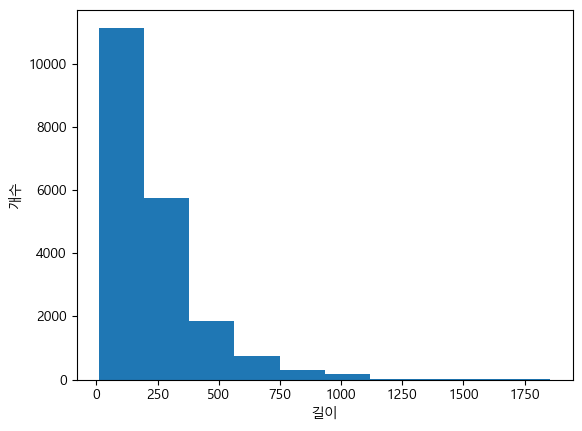

In [10]:
plt.hist(lengths)
plt.xlabel('길이')
plt.ylabel('개수')
plt.show()

In [40]:
# 시퀀스 패딩
# 글자의 수를 제한해서 없는 부분은 0 으로 채움
 # 최대 글자 수 100개로 제한
from keras.preprocessing.sequence import pad_sequences

train_seq = pad_sequences(train_input,maxlen=100)

In [41]:
# 20,000개 샘플, 크기 100
train_seq.shape

(20000, 100)

In [13]:
# 시퀀스 패딩해서 0이 없으면 글자가 100자 보다 길다.
# 시퀀스 패딩은 글자를 자를 때 앞부분을 자른다. (뒤 내용이 더 중요하다고 판단함)
print(train_seq[0])

[ 10   4  20   9   2 364 352   5  45   6   2   2  33 269   8   2 142   2
   5   2  17  73  17 204   5   2  19  55   2   2  92  66 104  14  20  93
  76   2 151  33   4  58  12 188   2 151  12 215  69 224 142  73 237   6
   2   7   2   2 188   2 103  14  31  10  10 451   7   2   5   2  80  91
   2  30   2  34  14  20 151  50  26 131  49   2  84  46  50  37  80  79
   6   2  46   7  14  20  10  10 470 158]


In [14]:
print(train_input[0][-10:])

[6, 2, 46, 7, 14, 20, 10, 10, 470, 158]


In [15]:
# 6번째 샘플은 앞부분이 0 으로 채워있다 -> 글자 수가 100자 보다 적음.
print(train_seq[5])

[  0   0   0   0   1   2 195  19  49   2   2 190   4   2 352   2 183  10
  10  13  82  79   4   2  36  71 269   8   2  25  19  49   7   4   2   2
   2   2   2  10  10  48  25  40   2  11   2   2  40   2   2   5   4   2
   2  95  14 238  56 129   2  10  10  21   2  94 364 352   2   2  11 190
  24 484   2   7  94 205 405  10  10  87   2  34  49   2   7   2   2   2
   2   2 290   2  46  48  64  18   4   2]


In [42]:
# 검증세트 시퀀스 패딩
val_seq = pad_sequences(val_input,maxlen=100)

In [43]:
# 순환 신경망 모델 구현
model = keras.Sequential()
# 순환 신경망 알고리즘
# 시퀀스 패딩 - 크기 100 / 단어사전(num_words) - 500개
model.add(keras.layers.SimpleRNN(8,input_shape=(100,500)))
# 이진분류
model.add(keras.layers.Dense(1,activation='sigmoid'))

c:\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [18]:
# fit 훈련 데이터 3차원 행렬로 맞춰야함
train_oh = keras.utils.to_categorical(train_seq) # 원-핫 인코딩

In [19]:
# 원-핫 인코딩 된 값을 출력 -> 10번째 값이 1로 변경
train_oh[0][0][:12]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.])

In [20]:
# 500개 컬럼의 합은 무조건 1
print(np.sum(train_oh[0][0]))

1.0


In [21]:
# val_seq 원-핫 인코딩
val_oh = keras.utils.to_categorical(val_seq)

In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 8)              │         4,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,081 (15.94 KB)

 Trainable params: 4,081 (15.94 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
rmsprop = keras.optimizers.RMSprop(learning_rate=0.0001)
model.compile(optimizer=rmsprop,loss='binary_crossentropy',metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('simpleRnn_model.keras')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,restore_best_weights=True )
history = model.fit(train_oh,train_target,batch_size=64,epochs=100,validation_data=(val_oh,val_target), callbacks=[checkpoint_cb,early_stopping_cb])

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.4988 - loss: 0.6961 - val_accuracy: 0.5432 - val_loss: 0.6887
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.5573 - loss: 0.6836 - val_accuracy: 0.6086 - val_loss: 0.6634
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6269 - loss: 0.6557 - val_accuracy: 0.6474 - val_loss: 0.6449
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.6674 - loss: 0.6349 - val_accuracy: 0.6730 - val_loss: 0.6243
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6962 - loss: 0.6111 - val_accuracy: 0.6990 - val_loss: 0.6046
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7195 - loss: 0.5937 - val_accuracy: 0.7096 - val_loss: 0.5899
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7348 - loss: 0.5752 - val_accuracy: 0.7342 - val_loss: 0.5696
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7473 - loss: 0.5595 - val_ac

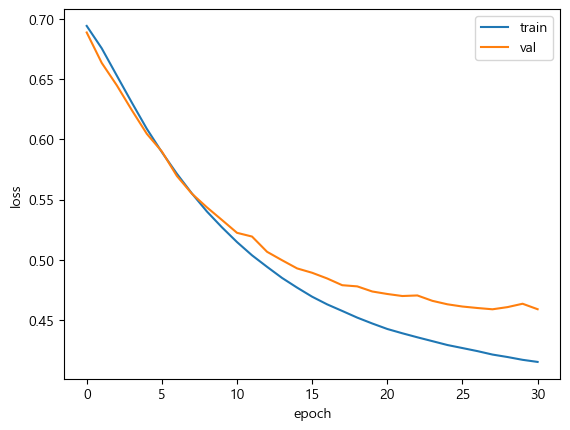

In [24]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [25]:
model.evaluate(val_oh,val_target)


157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7821 - loss: 0.4651


[0.4589706063270569, 0.7864000201225281]

In [26]:
# test_input
test_seq = pad_sequences(test_input,maxlen=100)
test_oh = keras.utils.to_categorical(test_seq)

In [27]:
model.evaluate(test_oh,test_target)

782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7910 - loss: 0.4506


[0.4503312110900879, 0.7911999821662903]

단어 임베딩

In [44]:
model2 = keras.Sequential()
# 임베딩 층 추가
model2.add(keras.layers.Embedding(500,16,input_length=100))
model2.add(keras.layers.SimpleRNN(8))
model2.add(keras.layers.Dense(1,activation='sigmoid'))

c:\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [45]:
model2.summary()


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_5 (SimpleRNN)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [46]:
# 원-핫 인코딩을 사용하지 않고 임베딩 층 사용
rmsprop = keras.optimizers.RMSprop(learning_rate=0.0001)
model2.compile(optimizer=rmsprop,loss='binary_crossentropy',metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('simpleRnn_embedding_model.keras')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,restore_best_weights=True )
history = model2.fit(train_seq,train_target,batch_size=64,epochs=100,validation_data=(val_seq,val_target), callbacks=[checkpoint_cb,early_stopping_cb])

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.5052 - loss: 0.6939 - val_accuracy: 0.5178 - val_loss: 0.6927
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.5324 - loss: 0.6900 - val_accuracy: 0.5336 - val_loss: 0.6909
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5497 - loss: 0.6873 - val_accuracy: 0.5336 - val_loss: 0.6895
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5588 - loss: 0.6851 - val_accuracy: 0.5344 - val_loss: 0.6886
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5793 - loss: 0.6800 - val_accuracy: 0.5448 - val_loss: 0.6874
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5787 - loss: 0.6789 - val_accuracy: 0.5422 - val_loss: 0.6869
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5939 - loss: 0.6741 - val_accuracy: 0.5456 - val_loss: 0.6851
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6053 - loss: 0.6697 - val_accu

In [47]:
model2.evaluate(val_seq,val_target)

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7881 - loss: 0.4687


[0.4664207994937897, 0.7928000092506409]

In [48]:
# test_input
test_seq = pad_sequences(test_input,maxlen=100)
model2.evaluate(test_seq,test_target)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7847 - loss: 0.4646


[0.46277180314064026, 0.7851999998092651]

In [ ]:
# 딥러닝 훈련
# 데이터전처리 train_seq = pad_sequences(train_input,maxlen=100)

# 모델결정 model = keras.Sequential()
# 순환 신경망 (RNN)
# model.add(keras.layers.SimpleRNN(8,input_shape=(100,500)))
# model.add(keras.layers.Dense(1,activation='sigmoid'))

# 인공신경망 훈련
# 모델설정 옵티마이저 - adam
# rmsprop = keras.optimizers.RMSprop(learning_rate=0.0001)
# model.compile(optimizer=rmsprop,loss='binary_crossentropy',metrics=['accuracy'])
# checkpoint_cb = keras.callbacks.ModelCheckpoint('simpleRnn_model.keras')
# early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,restore_best_weights=True )
# history = model.fit(train_oh,train_target,batch_size=64,epochs=100,validation_data=(val_oh,val_target), callbacks=[checkpoint_cb,early_stopping_cb])
# 모델평가 model.evaluate(val_scaled,val_target)

# test세트 검증 - 3차원행렬로 변경해서 test진행해야 함.
# test_scaled = test_input.reshape(-1,28,28,1)/255.0
# model.evaluate(test_scaled,test_target)